In [290]:
#RNN can take into account state of the previous inputs, CNN cannot
#LSTMs are type of RNN that give greater capability to long term learning

In [291]:
import numpy as np
import pandas as pd

In [292]:
data = pd.read_csv(r"TSLA.csv", date_parser = True)

#Dividing set into train and test
#80-20 split
cutoff = int(data.shape[0] * .8)
data_training = data[:cutoff]
data_testing = data[cutoff+1:]

In [293]:
data_testing

,Date,Open,High,Low,Close,Adj Close,Volume
1962,2018-04-16,299.000000,299.660004,289.010010,291.209991,291.209991,6338500
1963,2018-04-17,288.869995,292.170013,282.510010,287.690002,287.690002,7000000
1964,2018-04-18,291.079987,300.239990,288.160004,293.350006,293.350006,6557700
1965,2018-04-19,291.079987,301.010010,288.549988,300.079987,300.079987,6090600
1966,2018-04-20,295.170013,299.980011,289.750000,290.239990,290.239990,5627900
...,...,...,...,...,...,...,...
2447,2020-03-19,374.700012,452.000000,358.459991,427.640015,427.640015,30195500
2448,2020-03-20,438.200012,477.000000,425.790009,427.529999,427.529999,28285500
2449,2020-03-23,433.600006,442.000000,410.500000,434.290009,434.290009,16454500
2450,2020-03-24,477.299988,513.690002,474.000000,505.000000,505.000000,22895200


In [294]:
training_data = data_training.drop(['Date', 'Adj Close','High', 'Low'], axis = 1)
training_data

,Open,Close,Volume
0,19.000000,23.889999,18766300
1,25.790001,23.830000,17187100
2,25.000000,21.959999,8218800
3,23.000000,19.200001,5139800
4,20.000000,16.110001,6866900
...,...,...,...
1956,301.000000,299.299988,13520300
1957,300.369995,289.660004,10249800
1958,298.970001,304.700012,10989800
1959,300.739990,300.929993,7482900


In [295]:
import sklearn

scaler = sklearn.preprocessing.MinMaxScaler() #scale the data
training_data = scaler.fit_transform(training_data) #purpose is to normalize the data (normal distribution)
training_data #normalization is neccessary when we are working with multiple features that have different ranges because
              #it essentially puts those features into common terms (range [0,1])

array([[0.00771826, 0.02191224, 0.50337694],
       [0.02604237, 0.02174973, 0.46074816],
       [0.02391041, 0.01668472, 0.21865873],
       ...,
       [0.76327081, 0.78250274, 0.29345884],
       [0.76804747, 0.77229142, 0.19879391],
       [0.77231144, 0.75373778, 0.20219244]])

In [296]:
X_train = []
y_train = []

In [297]:
#Creating the batches below
for i in range(30, training_data.shape[0]):
    X_train.append(training_data[i-30:i]) #A single sample will contain 30 days worth of data 
    y_train.append(training_data[i,0]) #Trying to predict the 31st day

In [298]:
X_train, y_train = np.array(X_train), np.array(y_train) #Storing training samples in np array

In [299]:
X_train.shape #3557 is number of batches, 60 is sequence length, 5 is number of features

(1931, 30, 3)

In [300]:
#Builing LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

In [301]:
model = Sequential()
model.add(LSTM(units = 120, activation = "relu", return_sequences = True, input_shape = (X_train.shape[1], 3) )) 
#return sequences is true b/c we want each unit to pass on input to the next unit (cell)
#this is our input shape because a single layer is going to be 60x3, and we will have 1931 of these in our training data
model.add(Dropout(0.3))
model.add(LSTM(units = 120, activation = "relu", return_sequences = True)) #only need to specify input shape for first layer 
model.add(Dropout(0.2))
model.add(LSTM(units = 120, activation = "relu", return_sequences = True)) 
model.add(Dropout(0.3))
model.add(LSTM(units = 120, activation = "relu")) #Don't need return sequences because this is the final layer 
model.add(Dropout(0.3))
model.add(Dense(units = 1)) #Final output layer with only 1 output

In [302]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 30, 120)           59520     
_________________________________________________________________
dropout_40 (Dropout)         (None, 30, 120)           0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 30, 120)           115680    
_________________________________________________________________
dropout_41 (Dropout)         (None, 30, 120)           0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 30, 120)           115680    
_________________________________________________________________
dropout_42 (Dropout)         (None, 30, 120)           0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 120)             

In [303]:
#Compiling the model
model.compile(optimizer = "adam", loss=tf.keras.losses.MeanAbsolutePercentageError()) 
#optimizers change weights and learning rates of NN to reduce loss

In [317]:
model.fit(X_train, y_train, epochs = 5, batch_size = 64)

Train on 1931 samples
Epoch 1/5
1931/1931 [==============================] - 7s 4ms/sample - loss: 13.2822
Epoch 2/5
1931/1931 [==============================] - 7s 3ms/sample - loss: 13.7075
Epoch 3/5
1931/1931 [==============================] - 7s 4ms/sample - loss: 12.9686
Epoch 4/5
1931/1931 [==============================] - 7s 4ms/sample - loss: 13.3942
Epoch 5/5
1931/1931 [==============================] - 7s 4ms/sample - loss: 12.5618


In [318]:
#Testing this data against the google stock price (test data that we set aside)

#In order to predict the very first day of the test set, we need the last 30 days of the training set
last_30_days = data_training.tail(30)

In [319]:
df = last_30_days.append(data_testing, ignore_index = True)
df = df.drop(['Date', 'Adj Close', 'High', 'Low'], axis = 1)
df

,Open,Close,Volume
0,345.010010,330.929993,6885600
1,326.980011,335.119995,5092800
2,332.390015,333.350006,3823800
3,333.750000,328.200012,4285700
4,325.440002,332.299988,5007300
...,...,...,...
515,374.700012,427.640015,30195500
516,438.200012,427.529999,28285500
517,433.600006,434.290009,16454500
518,477.299988,505.000000,22895200


In [320]:
#scale the data
inputs = scaler.transform(df)
inputs

array([[0.88751858, 0.85354819, 0.18267045],
       [0.83886118, 0.86489706, 0.13427578],
       [0.85346111, 0.86010294, 0.10002052],
       ...,
       [1.12659561, 1.1335049 , 0.44097243],
       [1.24452836, 1.32502709, 0.61483207],
       [1.42790446, 1.41779523, 0.56812722]])

In [321]:
X_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    X_test.append(inputs[i-30:i])
    y_test.append(inputs[i, 0])

In [322]:
X_test, y_test = np.array(X_test), np.array(y_test)

X_test.shape

(490, 30, 3)

In [323]:
y_test.shape

(490,)

In [324]:
y_pred = model.predict(X_test)

In [325]:
#we want to scale these back into their normal values
scaler.scale_

array([2.69869111e-03, 2.70855905e-03, 2.69939048e-08])

In [326]:
scale = 1/scaler.scale_[0]
y_pred = y_pred * scale
y_test = y_test* scale

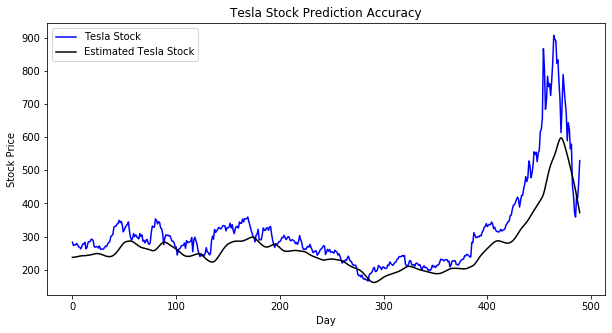

In [328]:
import matplotlib.pyplot as plt

#Visualize the results
plt.figure(figsize = (10,5))
plt.plot(y_test, color = 'blue', label = 'Tesla Stock')
plt.plot(y_pred, color = 'black', label = 'Estimated Tesla Stock')
plt.title('Tesla Stock Prediction Accuracy')
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()